In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
from tqdm import tqdm
from skimage import io, transform
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import joblib
label_encoder = preprocessing.LabelEncoder()


2023-02-03 15:58:19.388477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 15:58:19.987998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-03 15:58:19.988018: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-03 15:58:20.056154: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-03 15:58:21.541615: W tensorflow/stream_executor/platform/de

In [2]:
def count_cls(imgdir):
    cnt = []
    for i,folder_name in enumerate(os.listdir(imgdir)):
        l=len(os.listdir(f'{imgdir}/{folder_name}'))
        cnt.append(l)

    return cnt

In [3]:
%pwd

'/home/sanjay7178/Desktop/BOSTON/siamese'

In [4]:
imgdir="lfw-deepfunneled/lfw"
cnt=count_cls(imgdir)
print(len(cnt))

208


In [5]:
fig = px.bar(cnt)
fig.update_layout( title_text='Number of images per class')
# add color
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                    marker_line_width=1.5, opacity=0.6) 

fig.show()

# Train Set

In [28]:
def prepare_data(imgdir):
    x = []
    labels = []
    for i,folder_name in enumerate(os.listdir(imgdir)):
        for filename in tqdm(os.listdir(f'{imgdir}/{folder_name}')):
            if filename.endswith('jpg'):   
                im = cv2.imread(f'{imgdir}/{folder_name}/{filename}')
                if im is not None:
                    im = cv2.resize(im, (100, 100))
                    x.append(im)
                    labels.append(folder_name)
    return x , labels

In [29]:
imgdir="lfw-deepfunneled/lfw"
x_train,y_train=prepare_data(imgdir)

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 567.65it/s]


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 634.41it/s]


In [30]:
y_train= label_encoder.fit_transform(y_train)

In [31]:
joblib.dump(label_encoder,'labelEncoderPokemon.joblib',compress=9)
#label_encoder=joblib.load('labelEncoder.joblib')


['labelEncoderPokemon.joblib']

In [32]:
np.unique(y_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [33]:
# # make support set of images for classes in dataset and save them in a folder
# def make_support_set(imgdir):
#     for i,folder_name in enumerate(os.listdir(imgdir)):
#         for filename in tqdm(os.listdir(f'{imgdir}/{folder_name}')):
#             if filename.endswith('png'):   
#                 im = cv2.imread(f'{imgdir}/{folder_name}/{filename}')
#                 if im is not None:
#                     im = cv2.resize(im, (100, 100))
#                     cv2.imwrite(f'lfw-deepfunneled/support_set/{folder_name}.png',im)
#                     break
#     return

# imgdir="lfw-deepfunneled/lfw"
# make_support_set(imgdir)


In [34]:
# # make query set of images for classes in dataset and save them in a folder
# def make_query_set(imgdir):
#     for i,folder_name in enumerate(os.listdir(imgdir)):
#         for filename in tqdm(os.listdir(f'{imgdir}/{folder_name}')):
#             if filename.endswith('png'):   
#                 im = cv2.imread(f'{imgdir}/{folder_name}/{filename}')
#                 if im is not None:
#                     im = cv2.resize(im, (100, 100))
#                     cv2.imwrite(f'lfw-deepfunneled/query_set/{folder_name}.png',im)
#                     break
#     return

# imgdir="lfw-deepfunneled/train"
# make_query_set(imgdir)

# Support set

In [35]:
imgdir="lfw-deepfunneled/support_set"
x_support,y_support=prepare_data(imgdir)

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 600.92it/s]


# Query set

In [36]:
def prepare_Qdata(imgdir):
    x = []
    for filename in tqdm(os.listdir(f'{imgdir}')):
        if filename.endswith('jpg'):   
            im = cv2.imread(f'{imgdir}/{filename}')
            if im is not None:
                im = cv2.resize(im, (100, 100))
                x.append(im)
    return x

In [37]:
! ls lfw-deepfunneled/query_set

Ahmed_Chalabi_0001.jpg	Angela_Merkel_0001.jpg	     Bob_Graham_0001.jpg
Ai_Sugiyama_0001.jpg	Antonio_Banderas_0001.jpg    Bob_Stoops_0001.jpg
Allyson_Felix_0001.jpg	Benazir_Bhutto_0001.jpg
Al_Sharpton_0001.jpg	Benjamin_Netanyahu_0001.jpg


In [38]:
x_query=prepare_Qdata("/home/sanjay7178/Desktop/BOSTON/siamese/lfw-deepfunneled/query_set")

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 461.52it/s]


In [40]:
print(x_query[4])

[[[ 0  1  0]
  [ 1  1  0]
  [ 4  0  0]
  ...
  [ 0  1  0]
  [ 0  1  0]
  [ 2  0  0]]

 [[ 0  1  0]
  [ 2  0  0]
  [ 4  0  0]
  ...
  [ 3  0  0]
  [ 3  0  0]
  [ 3  0  0]]

 [[ 3 27 30]
  [ 6 26 30]
  [ 8 26 30]
  ...
  [13 32 35]
  [14 31 35]
  [13 30 35]]

 ...

 [[36 42 41]
  [36 42 41]
  [36 42 41]
  ...
  [16  9 32]
  [24 16 40]
  [28 20 44]]

 [[34 40 38]
  [35 42 39]
  [36 41 39]
  ...
  [26 22 49]
  [28 22 51]
  [31 26 55]]

 [[36 43 40]
  [34 41 38]
  [34 40 38]
  ...
  [34 30 64]
  [37 33 68]
  [36 32 67]]]


In [41]:
plt.imshow(x_query[4])
plt.colorbar()
plt.show()


# Make Pair

In [42]:
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

        # add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")


pairs_train, labels_train = make_pairs(x_train, y_train)

In [43]:
pairs_train.shape

(2350, 2, 100, 100, 3)

In [45]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):

    num_row = to_show // num_col if to_show // num_col != 0 else 1

    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()

2023-02-02 22:34:13.242320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sanjay7178/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-02 22:34:13.243153: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-02 22:34:13.243178: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sanjay-Lenovo-IdeaPad-S340-15IWL): /proc/driver/nvidia/version does not exist
2023-02-02 22:34:13.249921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


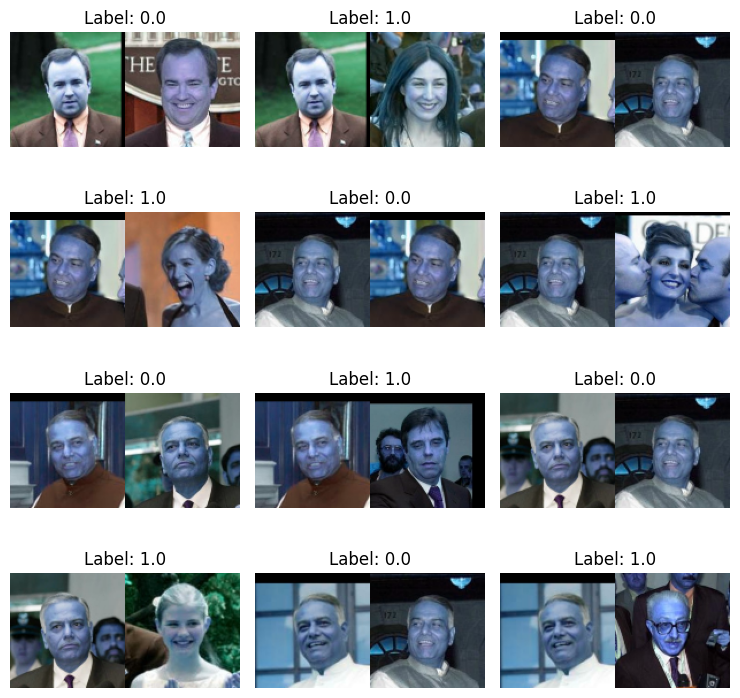

In [46]:
visualize(pairs_train[56:], labels_train[56:], to_show=12, num_col=3)


In [47]:
x_train_1 = pairs_train[:, 0] 
x_train_2 = pairs_train[:, 1]

In [48]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

In [49]:
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

In [50]:
def Embedding_ConvLayer():
    input = layers.Input((100, 100, 3))
    x = tf.keras.layers.BatchNormalization()(input)
    x = layers.Conv2D(14, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = layers.Dense(10, activation="tanh")(x)
    embedding_network = keras.Model(input, x)
    
    return embedding_network 


In [51]:
input_1 = layers.Input((100, 100, 3))
input_2 = layers.Input((100, 100, 3))

# sister nework
embedding_network=Embedding_ConvLayer()

# Encoded vector - 1
tower_1 = embedding_network(input_1)

# Encoded vector - 2
tower_2 = embedding_network(input_2)

# Euclidean Distance
merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])

normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)

output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)

siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)


In [52]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

siamese.compile(loss=loss(margin=1), optimizer=opt, metrics=["accuracy"])
siamese.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 10)           115118      ['input_1[0][0]',                
                                                                  'input_2[0][0]']          

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(siamese, to_file=dot_img_file, show_shapes=True)

In [53]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    batch_size=24,
    epochs=10
)

2023-02-02 22:35:50.338374: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 70500000 exceeds 10% of free system memory.
2023-02-02 22:35:50.409194: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 70500000 exceeds 10% of free system memory.


Epoch 1/10
98/98 [==============================] - 22s 211ms/step - loss: 0.2337 - accuracy: 0.6238
Epoch 2/10
98/98 [==============================] - 25s 258ms/step - loss: 0.1843 - accuracy: 0.7226
Epoch 3/10
98/98 [==============================] - 36s 364ms/step - loss: 0.1664 - accuracy: 0.7549
Epoch 4/10
98/98 [==============================] - 24s 242ms/step - loss: 0.1543 - accuracy: 0.7830
Epoch 5/10
98/98 [==============================] - 30s 310ms/step - loss: 0.1385 - accuracy: 0.8132
Epoch 6/10
98/98 [==============================] - 32s 330ms/step - loss: 0.1309 - accuracy: 0.8315
Epoch 7/10
98/98 [==============================] - 26s 261ms/step - loss: 0.1220 - accuracy: 0.8409
Epoch 8/10
98/98 [==============================] - 29s 292ms/step - loss: 0.1120 - accuracy: 0.8732
Epoch 9/10
98/98 [==============================] - 27s 274ms/step - loss: 0.1066 - accuracy: 0.8753
Epoch 10/10
98/98 [==============================] - 33s 337ms/step - loss: 0.1009 - accura

In [54]:
siamese.save("home/sanjay7178/Desktop/BOSTON/siamese/lfw-deepfunneled/saved_model.h5")

# Loading trained custom lamda layer model

In [63]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

def Embedding_ConvLayer():
    input = layers.Input((100, 100, 3))
    x = tf.keras.layers.BatchNormalization()(input)
    x = layers.Conv2D(14, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = layers.Dense(10, activation="tanh")(x)
    embedding_network = keras.Model(input, x)
    
    return embedding_network 




input_1 = layers.Input((100, 100, 3))
input_2 = layers.Input((100, 100, 3))

embedding_network=Embedding_ConvLayer()

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])

normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)

output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)

siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)

opt = keras.optimizers.Adam(learning_rate=0.0001)

siamese.compile(loss=loss(margin=1), optimizer=opt, metrics=["accuracy"])


In [64]:
siamese.load_weights("home/sanjay7178/Desktop/BOSTON/siamese/lfw-deepfunneled/saved_model.h5")

# Query image we are going to use

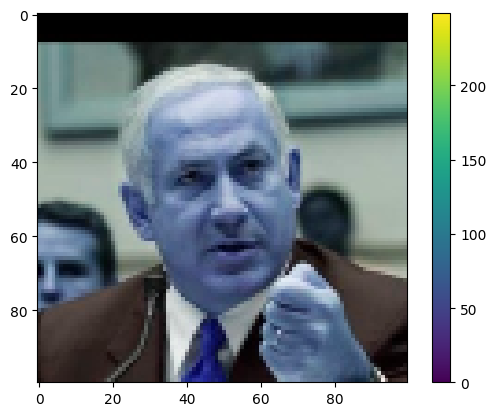

In [65]:
input_image = cv2.resize(x_query[1], (100, 100))
input_image = np.expand_dims(input_image, 0)
plt.imshow(input_image[0])
plt.colorbar()
plt.show()


## N way K shot 

### N - number of class labels 
### K - number of samples

### k=1 then one shot

# One shot learning




#### with five classes, just one image from each of those five classes is used.

##  5 way 1 shot

In [70]:
def eval_(im1,imgdir, shot=1):
    for i,folder_name in enumerate(os.listdir(imgdir)):
        for i in range(shot):
            rn=random.choice(os.listdir(f'{imgdir}/{folder_name}'))
            if rn.endswith('jpg'):   
                im = cv2.imread(f'{imgdir}/{folder_name}/{rn}')
                if im is not None:
                    im = cv2.resize(im, (100, 100))
                    im = np.expand_dims(im, 0)
                    pred=siamese.predict([im1, im])
                    print("Similarity Score",pred)
                    plt.imshow(im[0])
                    plt.colorbar()
                    plt.show()
        print("-"*100)
    return 

1/1 [==============================] - 0s 116ms/step
Similarity Score [[0.8839533]]


----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.8204569]]


----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.936032]]


----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Similarity Score [[0.77480763]]


----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.90967536]]


----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 20ms/step
Similarity Score [[0.26545724]]


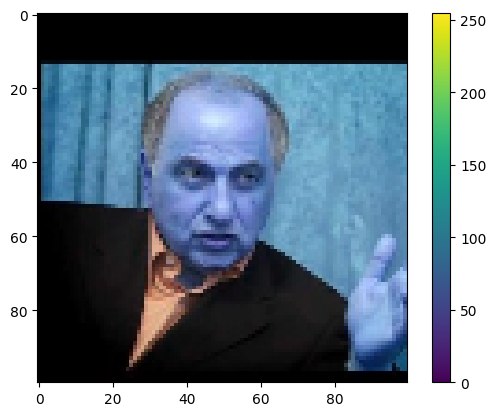

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 20ms/step
Similarity Score [[0.88895303]]


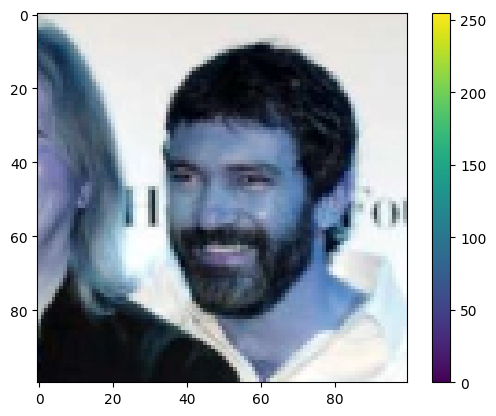

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 20ms/step
Similarity Score [[0.15673023]]


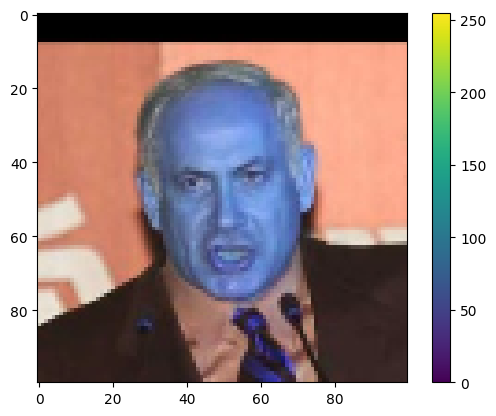

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.94639593]]


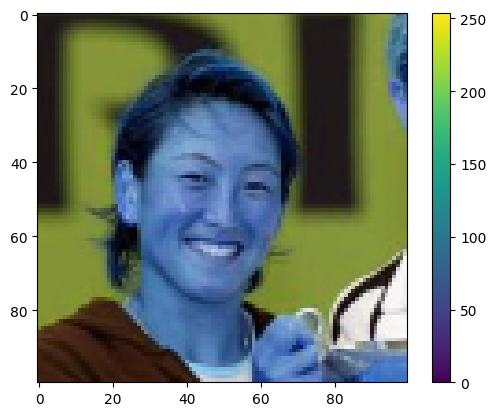

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.23375967]]


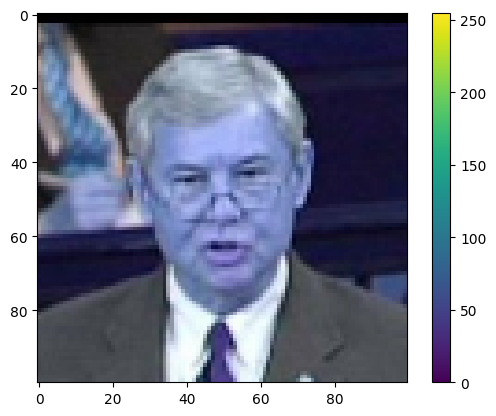

----------------------------------------------------------------------------------------------------


In [71]:
eval_(input_image,"lfw-deepfunneled/support_set/",1)

# Few shot learning

## k > 1

1/1 [==============================] - 0s 28ms/step
Similarity Score [[0.8116578]]


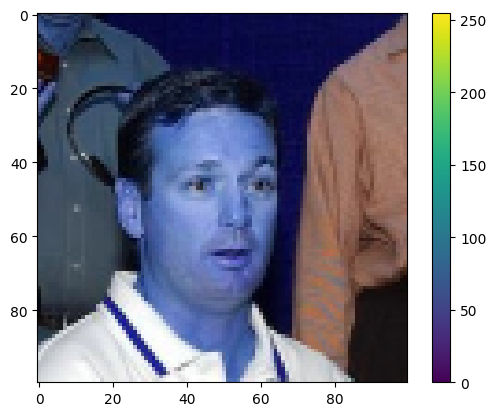

1/1 [==============================] - 0s 20ms/step
Similarity Score [[0.93235344]]


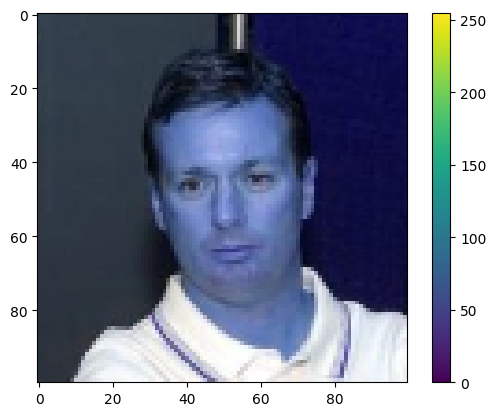

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Similarity Score [[0.69633895]]


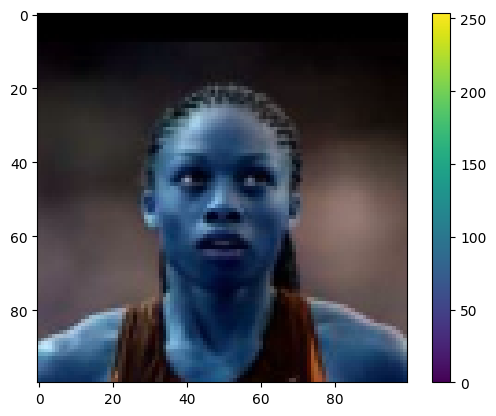

1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.8204569]]


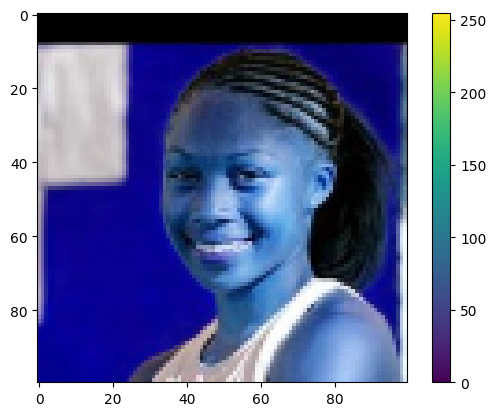

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.95897126]]


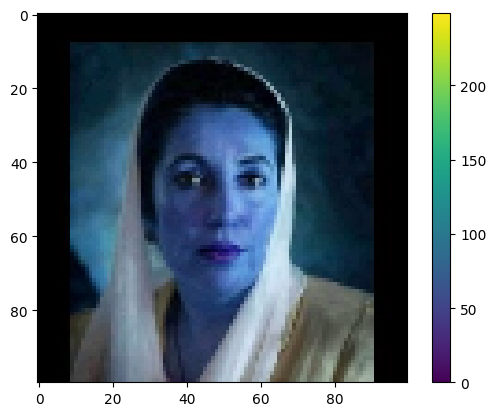

1/1 [==============================] - 0s 20ms/step
Similarity Score [[0.936032]]


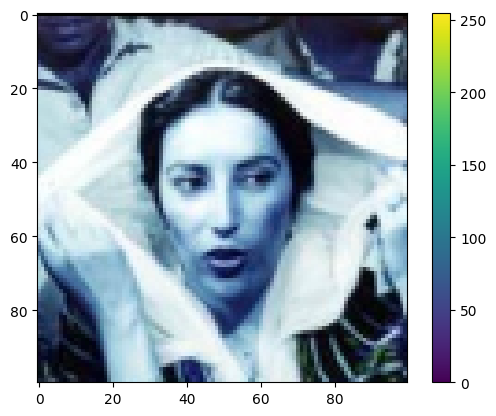

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 20ms/step
Similarity Score [[0.14990886]]


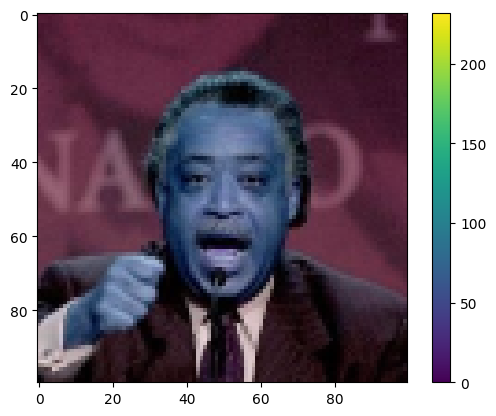

1/1 [==============================] - 0s 22ms/step
Similarity Score [[0.14990886]]


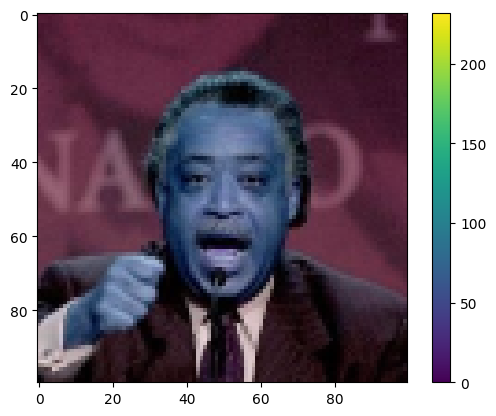

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Similarity Score [[0.85148996]]


1/1 [==============================] - 0s 25ms/step
Similarity Score [[0.90967536]]


----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 23ms/step
Similarity Score [[0.12316804]]


1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.37058002]]


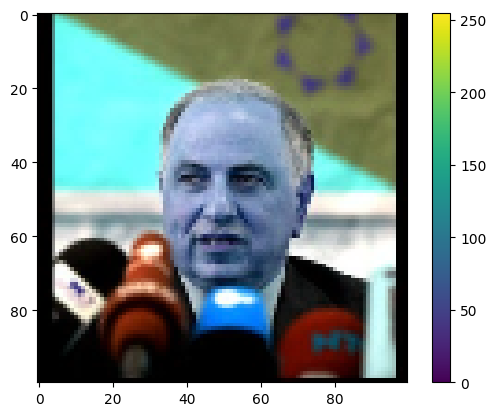

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 24ms/step
Similarity Score [[0.93452674]]


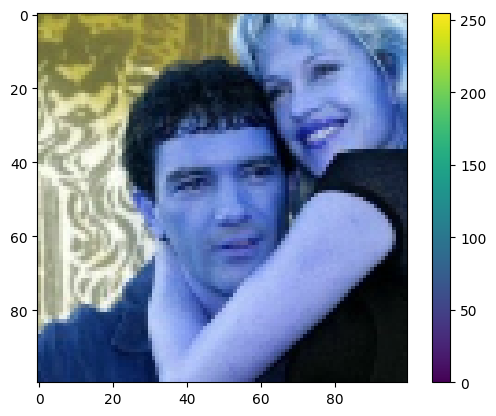

1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.9085764]]


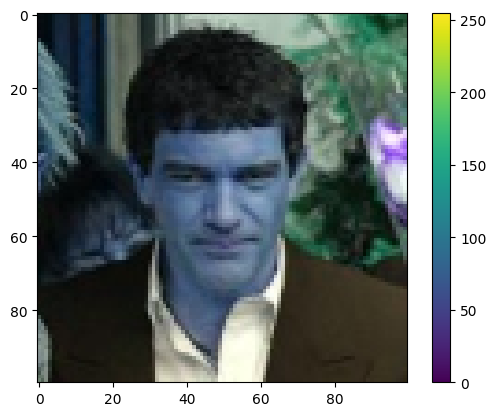

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Similarity Score [[0.24735239]]


1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.24735239]]


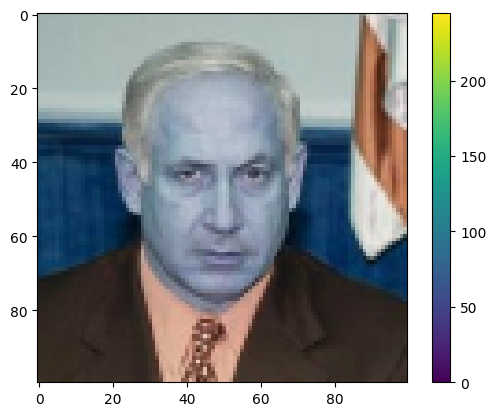

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 23ms/step
Similarity Score [[0.92475104]]


1/1 [==============================] - 0s 22ms/step
Similarity Score [[0.96561605]]


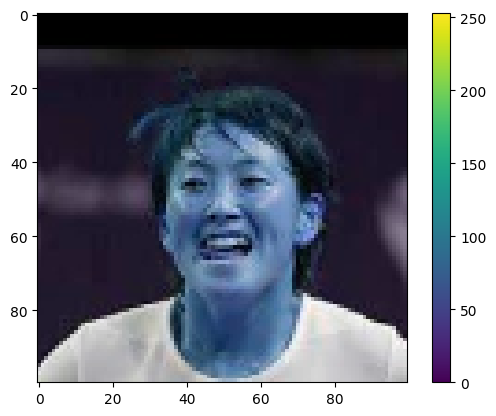

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Similarity Score [[0.09674233]]


1/1 [==============================] - 0s 19ms/step
Similarity Score [[0.13262965]]


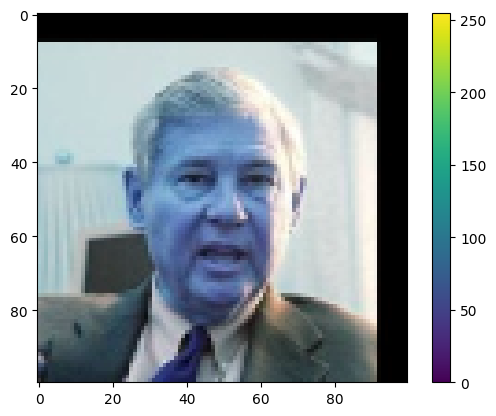

----------------------------------------------------------------------------------------------------


In [72]:
eval_(input_image,"lfw-deepfunneled/support_set",2)